In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pySAMetrics
import matplotlib.pyplot as plt
from pySAMetrics.Simulation_2 import Simulation
from pySAMetrics.utils import generate_simulation_paths
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import math
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import ticker

In [4]:
# Initialize the main dictionary
data_dict = {
    'squall_line': {'velocity': '7.5', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
     'control_short': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'}
    }

In [ ]:




def load_simulation(simu_parameters, i=1000, path_raw_data='/Users/sophieabramian/Documents/DeepCloudLab/data/squall_lines'):
    """
    Load and run the simulation for the given parameters.

    Parameters:
    - simu_parameters (dict): Dictionary containing simulation parameters.

    Returns:
    - Simulation object or None if failed to load.
    """
    try:
        if i!=1000:
            paths = {
            'path_3d': os.path.join(path_raw_data, f'3D/split_{i+1}.nc'),
            'path_2d': os.path.join(path_raw_data, f'2D/split_{i+1}.nc'),
            'path_1d': os.path.join(path_raw_data, f'1D/split_{i+1}.nc'),
            }

        else:
            paths = generate_simulation_paths(**simu_parameters, folder_path=path_raw_data)
            print(paths)

        simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                          **simu_parameters)
        return simu
    
    except FileNotFoundError as e:
        print(f"Error: {e}. Please check the simulation paths.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}.")
    
    return None


# Main execution block
keys = ['squall_line'] #['squall_line', 'control']

key="squall_line"

parameters = data_dict['squall_line']
path_data = f'/Volumes/LaCie/000_POSTDOC_2025/{key}'
simu = load_simulation(parameters, i=1000, path_raw_data=path_data)

simu.load(backup_folder_path=f'/Volumes/LaCie/000_POSTDOC_2025/squall_line/saved_simu')

print('hey hey!!!')
print(simu.name)

{'path_3d': '/Volumes/LaCie/000_POSTDOC_2025/squall_line/dataset_3d.nc', 'path_2d': '/Volumes/LaCie/000_POSTDOC_2025/squall_line/dataset_2d.nc', 'path_1d': '/Volumes/LaCie/000_POSTDOC_2025/squall_line/dataset_1d.nc'}
hey hey!!!
RCE_T300_U7.5_B1_M1


In [227]:
# Main execution block
keys = ['control_short'] #['squall_line', 'control']

key="control_short"

parameters = data_dict['control_short']
path_data = f'/Volumes/LaCie/000_POSTDOC_2025/{key}'
simu_control = load_simulation(parameters, i=1000, path_raw_data=path_data)

simu_control.load(backup_folder_path=f'/Volumes/LaCie/000_POSTDOC_2025/control_short/saved_simu')

print('hey hey!!!')
print(simu_control.name)

{'path_3d': '/Volumes/LaCie/000_POSTDOC_2025/control_short/dataset_3d.nc', 'path_2d': '/Volumes/LaCie/000_POSTDOC_2025/control_short/dataset_2d.nc', 'path_1d': '/Volumes/LaCie/000_POSTDOC_2025/control_short/dataset_1d.nc'}
hey hey!!!
RCE_T300_U0_B1_M1


In [111]:


new_variable = simu.dataset_isentropic.RHO_W_sum[:,:48,1:49]   # Extract the new variabl

array_isentropic_all=np.array(new_variable)
reshaped_data = array_isentropic_all.reshape(-1, 48, 48)


In [ ]:
from pySAMetrics.composite_analysis import set_composite_variables

In [34]:
set_composite_variables(simulation=simu, 
                        data_name= 'BUOYANCY', 
                        variable_to_look_for_extreme='Prec', 
                        extreme_events_choice='max', 
                        x_margin=40, 
                        y_margin=40, 
                        dataset_for_variable_2d= "dataset_2d", 
                        dataset_for_variable_3d= "dataset_computed_3d")

100%|██████████| 721/721 [00:04<00:00, 165.81it/s]


In [67]:
set_composite_variables(simulation=simu, 
                        data_name= 'FMSE', 
                        variable_to_look_for_extreme='Prec', 
                        extreme_events_choice='max', 
                        x_margin=40, 
                        y_margin=40, 
                        dataset_for_variable_2d= "dataset_2d", 
                        dataset_for_variable_3d= "dataset_computed_3d")

100%|██████████| 721/721 [00:06<00:00, 117.48it/s]


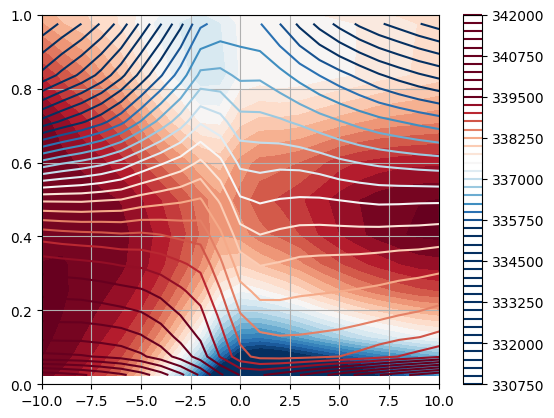

In [95]:
import cmocean
x, z = np.linspace(-40,40, 81), simu.dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(x,z)
plt.contourf(XX,ZZ, simu.BUOYANCY_composite_Prec[:,40,:], 50, cmap='RdBu_r', vmin=-0.0350, vmax=0)
plt.contour(XX[:12,:],ZZ[:12,:], simu.FMSE_composite_Prec[:12,40,:], 50, cmap='RdBu_r', vmin=335500, vmax=339500)
plt.colorbar()
plt.ylim(0,1)
plt.xlim(-10, 10)
plt.grid(True)


In [96]:
set_composite_variables(simulation=simu, 
                        data_name= 'BUOYANCY', 
                        variable_to_look_for_extreme='CR', 
                        extreme_events_choice='max', 
                        x_margin=40, 
                        y_margin=40, 
                        dataset_for_variable_2d= "dataset_computed_2d", 
                        dataset_for_variable_3d= "dataset_computed_3d")

100%|██████████| 721/721 [00:06<00:00, 110.86it/s]


In [97]:
set_composite_variables(simulation=simu, 
                        data_name= 'FMSE', 
                        variable_to_look_for_extreme='CR', 
                        extreme_events_choice='max', 
                        x_margin=40, 
                        y_margin=40, 
                        dataset_for_variable_2d= "dataset_computed_2d", 
                        dataset_for_variable_3d= "dataset_computed_3d")

100%|██████████| 721/721 [00:06<00:00, 112.12it/s]


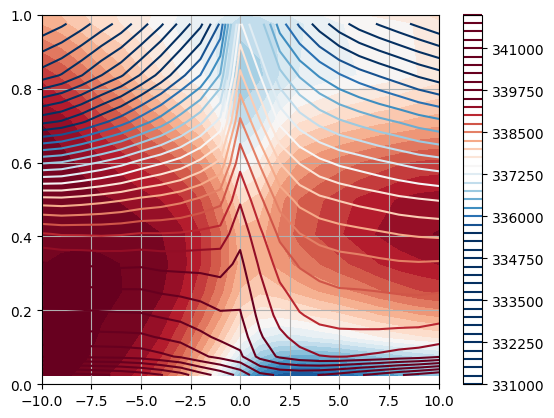

In [98]:
import cmocean
x, z = np.linspace(-40,40, 81), simu.dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(x,z)
plt.contourf(XX,ZZ, simu.BUOYANCY_composite_CR[:,40,:], 50, cmap='RdBu_r', vmin=-0.0350, vmax=0)
plt.contour(XX[:12,:],ZZ[:12,:], simu.FMSE_composite_CR[:12,40,:], 50, cmap='RdBu_r', vmin=335500, vmax=339500)
plt.colorbar()
plt.ylim(0,1)
plt.xlim(-10, 10)
plt.grid(True)


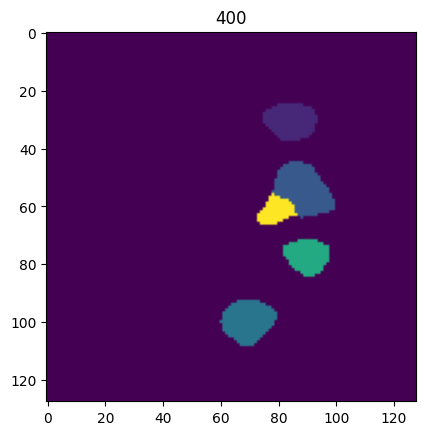

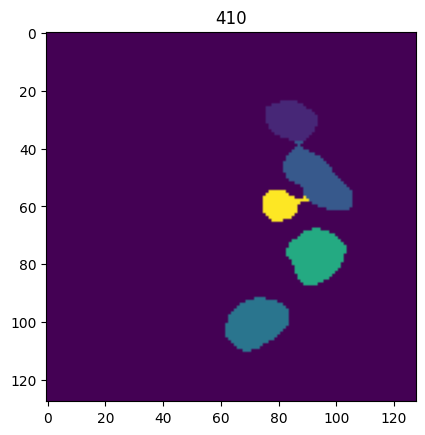

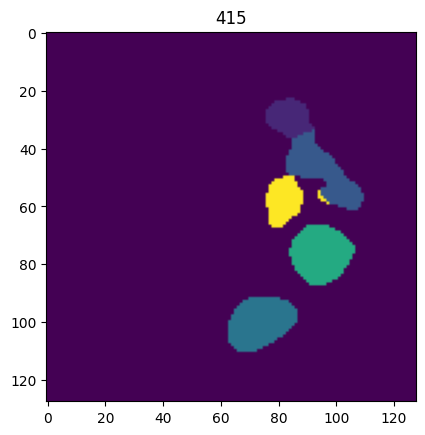

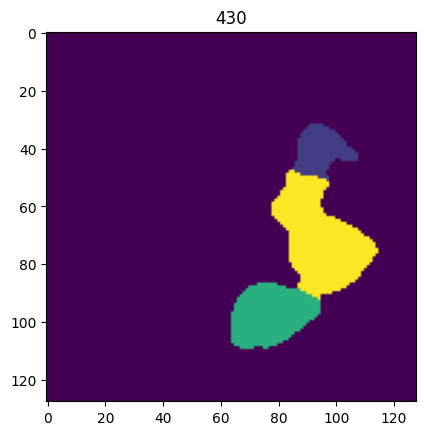

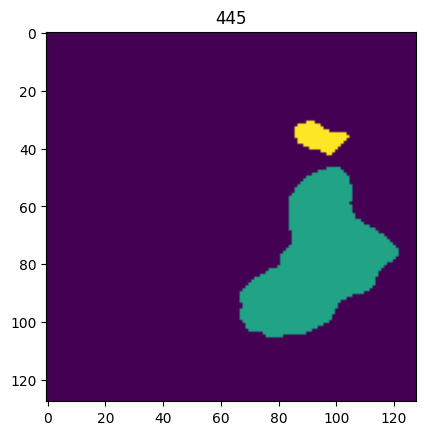

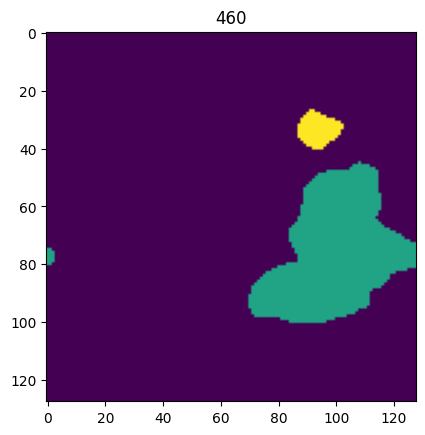

In [122]:
for i in [400, 410, 415, 430, 445, 460]:
    plt.imshow(simu.dataset_computed_2d.CP_LABELS[i])
    plt.title(i)
    plt.show()

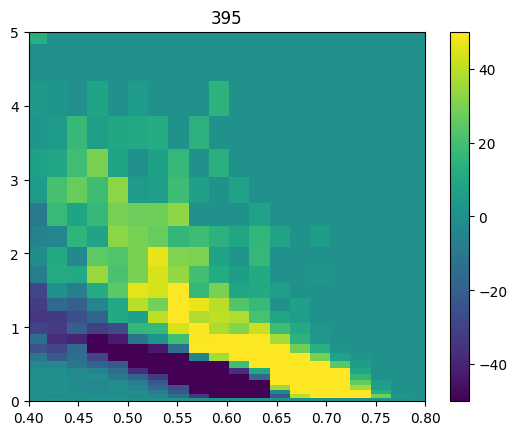

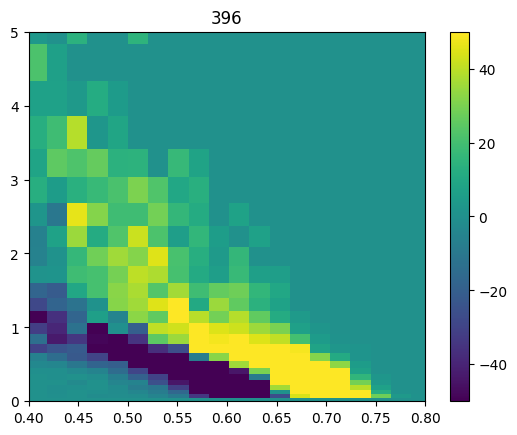

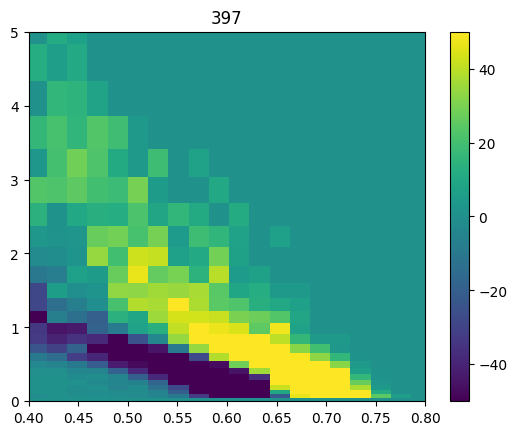

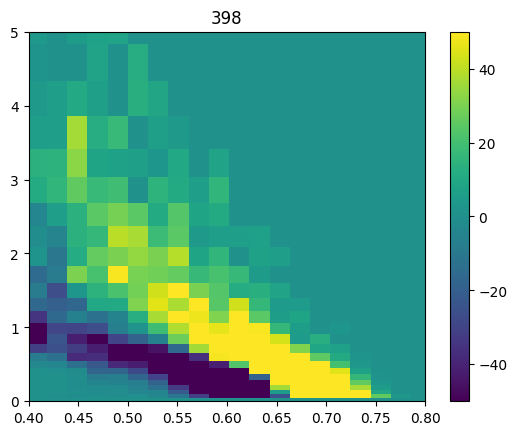

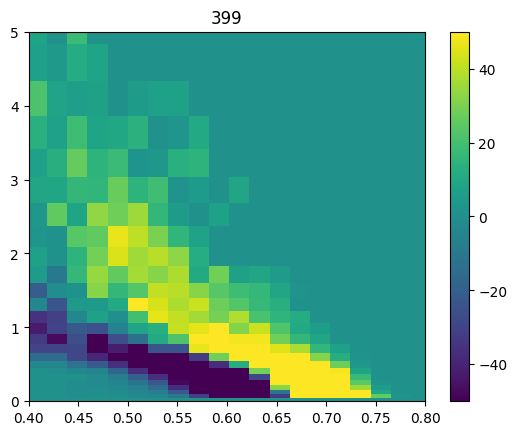

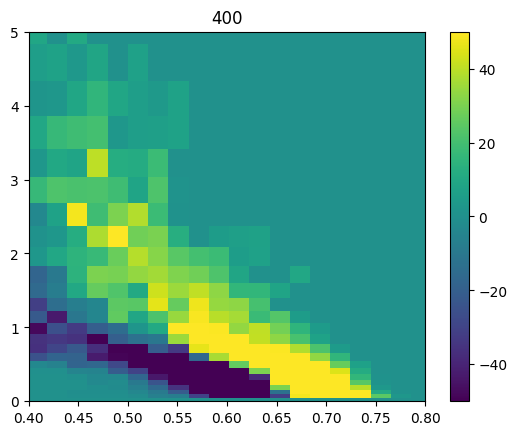

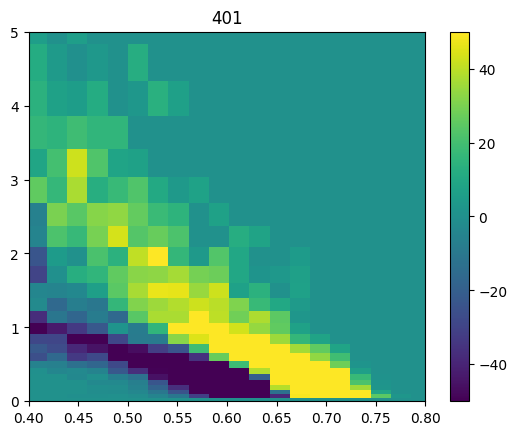

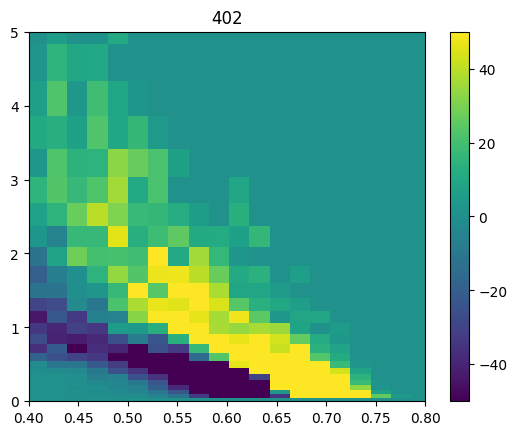

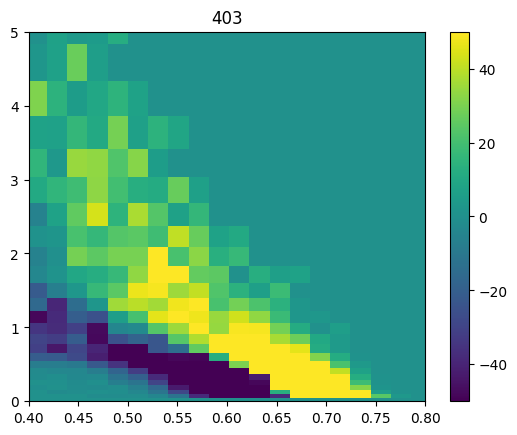

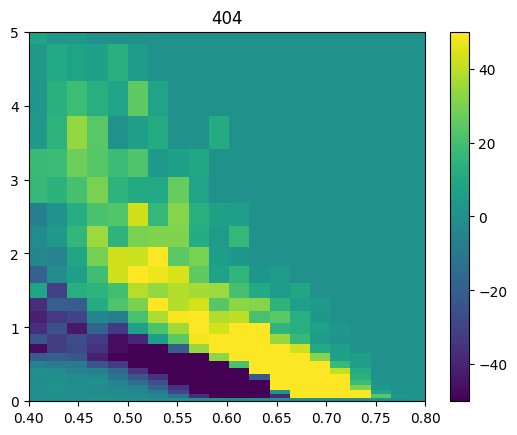

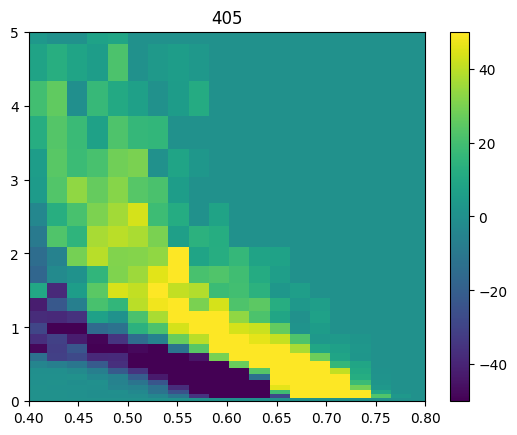

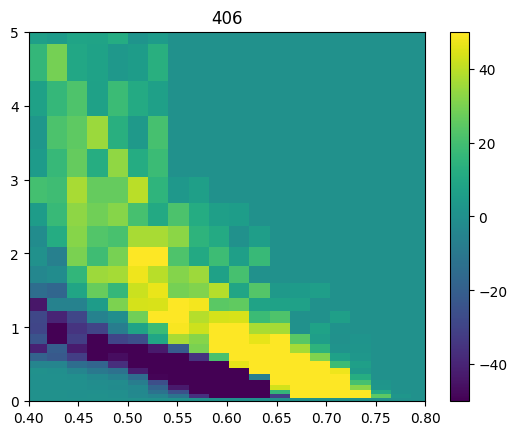

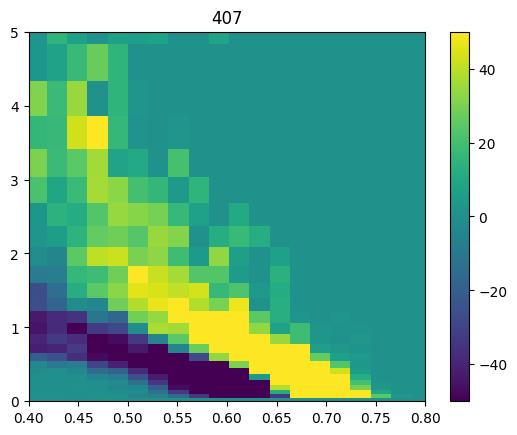

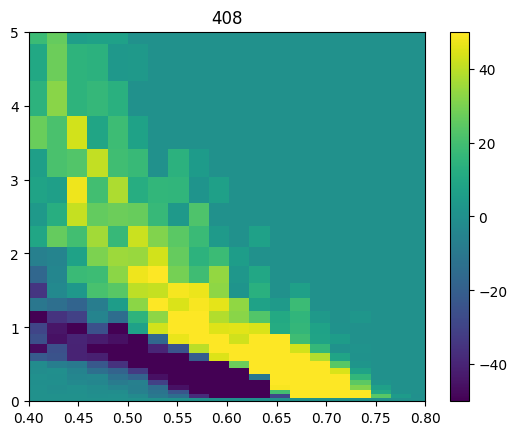

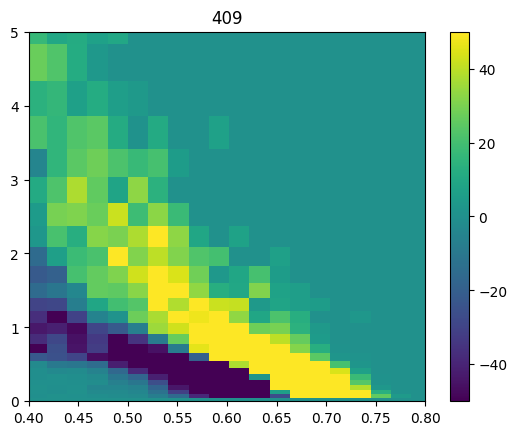

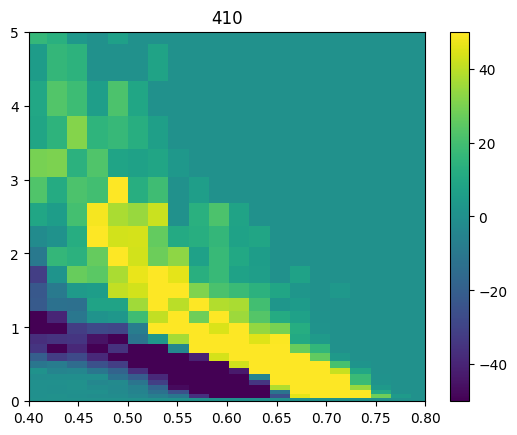

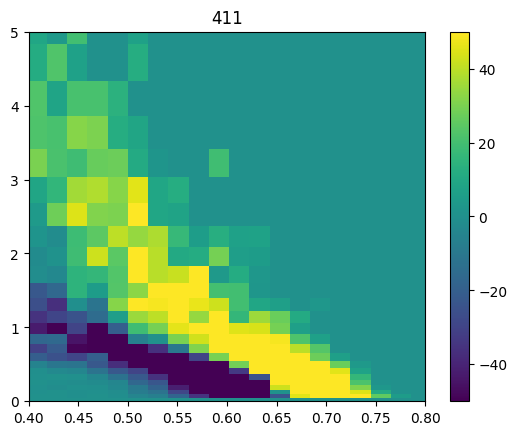

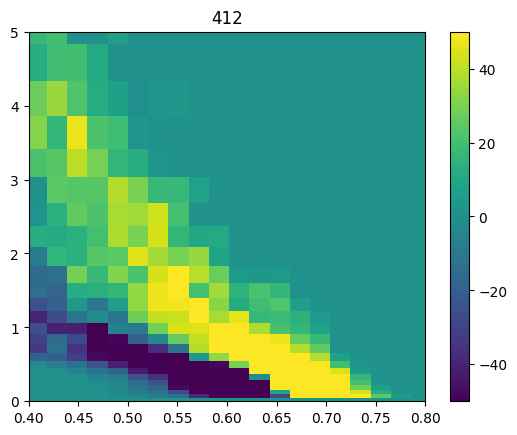

In [123]:
s, z = np.linspace(0,1,50), simu.dataset_3d.z.values/1000
SS,ZZ = np.meshgrid(s, z)
for i in range(395, 413):
    
    plt.pcolormesh(SS,ZZ,simu.dataset_isentropic.RHO_W_sum[i,:,:], vmin=-50, vmax=50)
    plt.colorbar()
    plt.title(i)
    plt.ylim(0,5)
    plt.xlim(0.4,0.8)
    plt.show()

In [3]:
from pySAMetrics.ColdPool import ColdPool, extract_cold_pools

In [146]:
label_array = simu.dataset_computed_2d.CP_LABELS.values
qv_array = simu.dataset_3d.QV[:,0].values
cold_pools = extract_cold_pools(label_array, qv_array)


In [147]:
len(cold_pools)

41

In [148]:
cp = cold_pools[0]

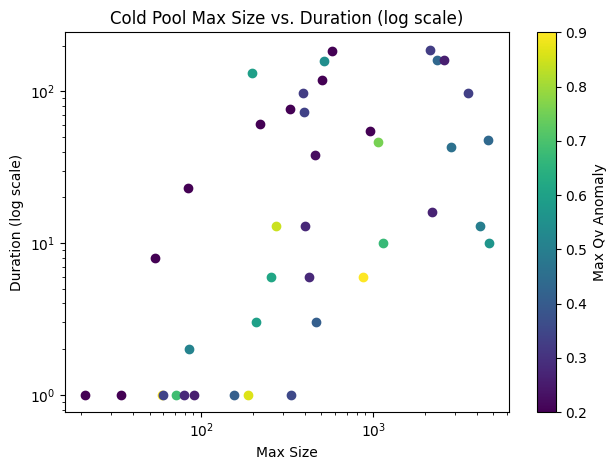

In [168]:
import matplotlib.pyplot as plt

for cp in cold_pools:
    plt.scatter(cp.max_size, cp.duration, c=cp.anomaly_qv, vmin=0.2, vmax=0.9)

plt.xscale('log')  # Set y-axis (duration) to logarithmic scale
plt.yscale('log')  # Set y-axis (duration) to logarithmic scale
plt.xlabel("Max Size")
plt.ylabel("Duration (log scale)")
plt.colorbar(label="Max Qv Anomaly")
plt.title("Cold Pool Max Size vs. Duration (log scale)")
plt.tight_layout()
plt.show()


In [176]:
cp.cluster['sizes']

[np.int64(4647),
 np.int64(4671),
 np.int64(4687),
 np.int64(4693),
 np.int64(4687),
 np.int64(4699),
 np.int64(4695),
 np.int64(4696),
 np.int64(4702),
 np.int64(4659)]

In [186]:
cp.start_time

0

In [ ]:
simu.dataset_computed_2d.CORE_BINARY

In [237]:
cp_core = simu.dataset_computed_2d.CORE_BINARY[410].values
cp_core[cp_core==0]=np.nan

In [240]:
cp_env = simu.dataset_computed_2d.ENVELOP_BINARY[410].values
cp_env[cp_env==0]=np.nan

In [ ]:
cp_env = simu.dataset_computed_2d.ENVELOP_BINARY[410].values
cp_env[cp_env==0]=np.nan

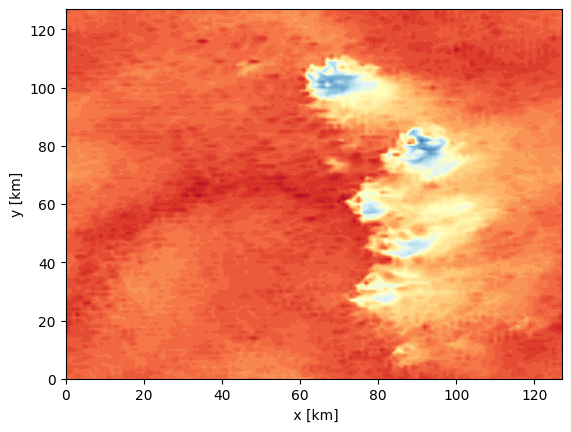

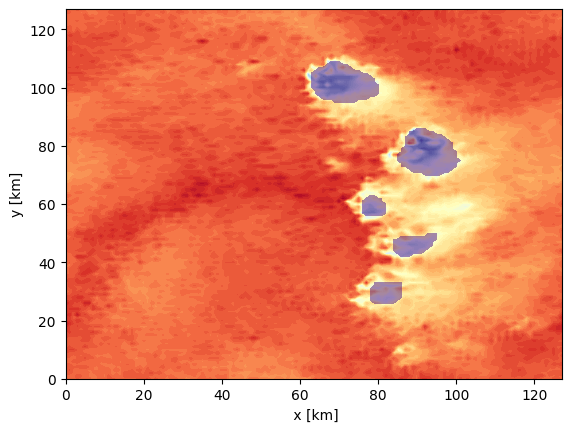

Text(0, 0.5, 'y [km]')

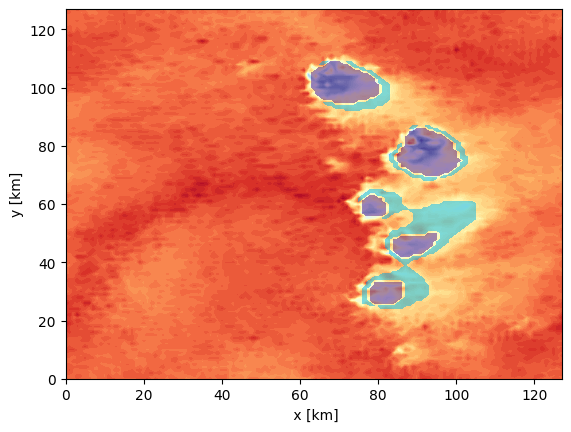

In [246]:
plt.contourf(simu.dataset_computed_3d.BUOYANCY[410,0], 50, cmap='RdYlBu_r')
plt.xlabel(' x [km]')
plt.ylabel('y [km]')
plt.show()
plt.contourf(simu.dataset_computed_3d.BUOYANCY[410,0], 50, cmap='RdYlBu_r')
plt.contourf(cp_core, 50, cmap='magma', alpha=0.5 )
plt.xlabel(' x [km]')
plt.ylabel('y [km]')
plt.show()
plt.contourf(simu.dataset_computed_3d.BUOYANCY[410,0], 50, cmap='RdYlBu_r')
plt.contourf(cp_core, 50, cmap='magma', alpha=0.5)
plt.contourf(cp_env, 50, cmap='rainbow', alpha=0.5)
plt.xlabel(' x [km]')
plt.ylabel('y [km]')



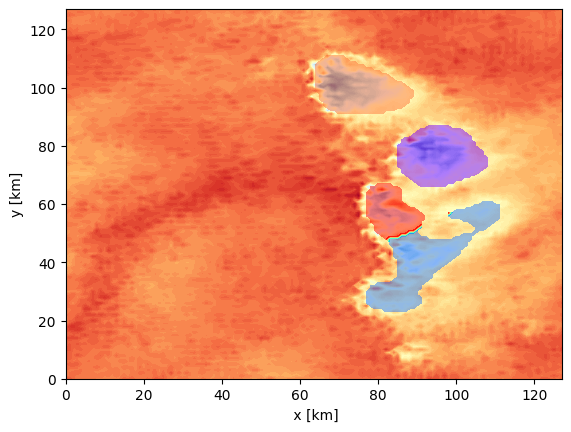

In [258]:
for i in range(400, 420):
    plt.contourf(simu.dataset_computed_3d.BUOYANCY[i,0], 50, cmap='RdYlBu_r')
    cp_lab = simu.dataset_computed_2d.CP_LABELS[i].values
    cp_lab[cp_lab==0]=np.nan
    plt.contourf(cp_lab%10, 50, cmap='rainbow', alpha=0.5)

    plt.xlabel(' x [km]')
    plt.ylabel('y [km]')
    plt.savefig(f'cp_anim/img_{str(i).zfill(3)}.png')


/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_59895/3045867518.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


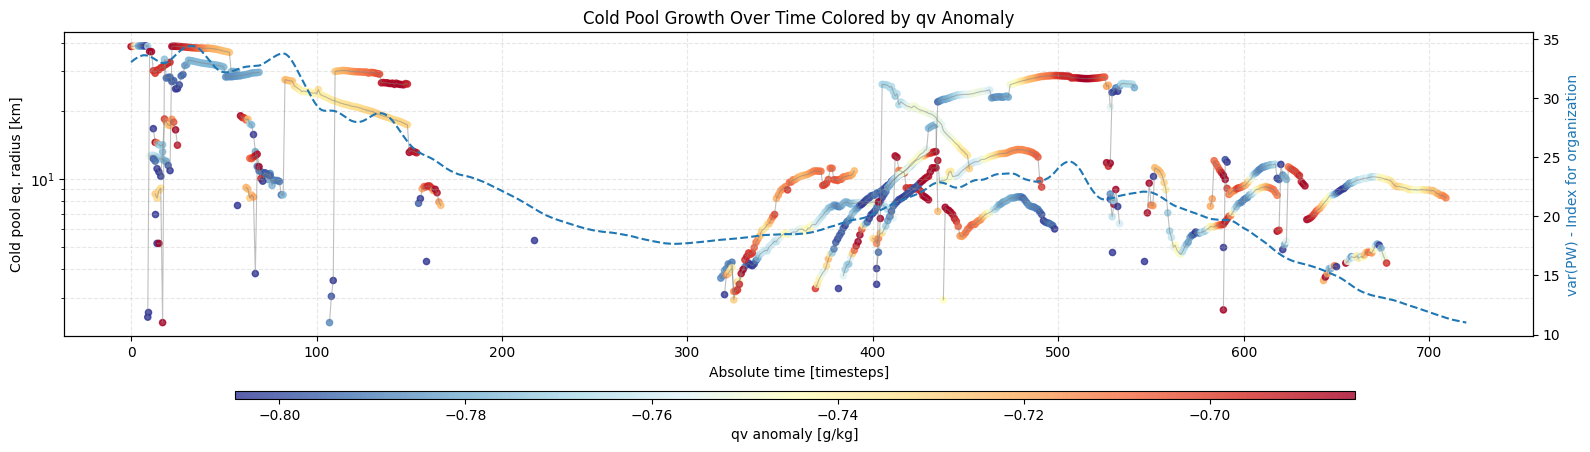

In [223]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16, 4))
ax2 = ax.twinx()  # secondary y-axis

# Add a new axis for the colorbar
cbar_ax = fig.add_axes([0.15, -0.01, 0.7, 0.02])  # Adjust position: [left, bottom, width, height]

for cp in cold_pools:
    birth_time = cp.start_time  # assuming this exists
    time_elapsed = np.arange(len(cp.cluster['sizes']))
    time_absolute = birth_time + time_elapsed

    size = np.sqrt(np.array(cp.cluster['sizes'])/np.pi)
    qv_anom = cp.cluster['qv_anomalies']

    # Line on main axis
    ax.plot(time_absolute, size, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)

    # Scatter with color on main axis
    sc = ax.scatter(time_absolute, size, c=qv_anom, cmap='RdYlBu_r', s=20, alpha=0.8)


ax2.plot(np.var(simu.dataset_2d.PW, axis=(-1, -2)),linestyle='--')#, marker="+")
# Axes labels and formatting
ax.set_yscale('log')  # Only if you want cold pool size in log scale
ax.set_xlabel('Absolute time [timesteps]')
ax.set_ylabel('Cold pool eq. radius [km]', color='black')
ax2.set_ylabel('var(PW) - Index for organization', color='tab:blue')  # This is optional

# Colorbar on the new axis
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('qv anomaly [g/kg]')

ax.set_title('Cold Pool Growth Over Time Colored by qv Anomaly')
ax.grid(True, which='both', ls='--', alpha=0.3)
fig.tight_layout()
plt.show()


In [228]:
label_array_control = simu_control.dataset_computed_2d.CP_LABELS.values
qv_array_control = simu_control.dataset_3d.QV[:,0].values
cold_pools_control = extract_cold_pools(label_array_control, qv_array_control)


/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_59895/605301346.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


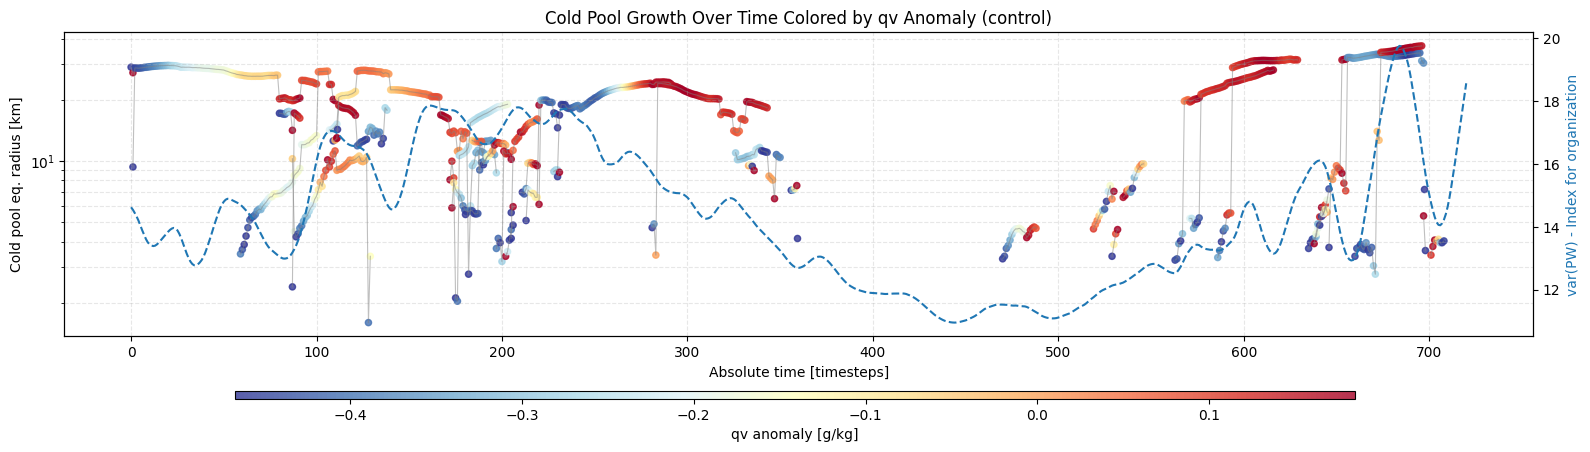

In [231]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16, 4))
ax2 = ax.twinx()  # secondary y-axis

# Add a new axis for the colorbar
cbar_ax = fig.add_axes([0.15, -0.01, 0.7, 0.02])  # Adjust position: [left, bottom, width, height]

for cp in cold_pools_control:
    birth_time = cp.start_time  # assuming this exists
    time_elapsed = np.arange(len(cp.cluster['sizes']))
    time_absolute = birth_time + time_elapsed

    size = np.sqrt(np.array(cp.cluster['sizes'])/np.pi)
    qv_anom = cp.cluster['qv_anomalies']

    # Line on main axis
    ax.plot(time_absolute, size, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)

    # Scatter with color on main axis
    sc = ax.scatter(time_absolute, size, c=qv_anom, cmap='RdYlBu_r', s=20, alpha=0.8)


ax2.plot(np.var(simu_control.dataset_2d.PW, axis=(-1, -2)),linestyle='--')#, marker="+")
# Axes labels and formatting
ax.set_yscale('log')  # Only if you want cold pool size in log scale
ax.set_xlabel('Absolute time [timesteps]')
ax.set_ylabel('Cold pool eq. radius [km]', color='black')
ax2.set_ylabel('var(PW) - Index for organization', color='tab:blue')  # This is optional

# Colorbar on the new axis
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('qv anomaly [g/kg]')

ax.set_title('Cold Pool Growth Over Time Colored by qv Anomaly (control)')
ax.grid(True, which='both', ls='--', alpha=0.3)
fig.tight_layout()
plt.show()


(array([3., 7., 5., 7., 7., 3., 3., 3., 2., 1.]),
 array([0.20383835, 0.29664001, 0.38944167, 0.48224336, 0.57504499,
        0.66784668, 0.76064837, 0.85345   , 0.94625169, 1.03905344,
        1.13185501]),
 <BarContainer object of 10 artists>)

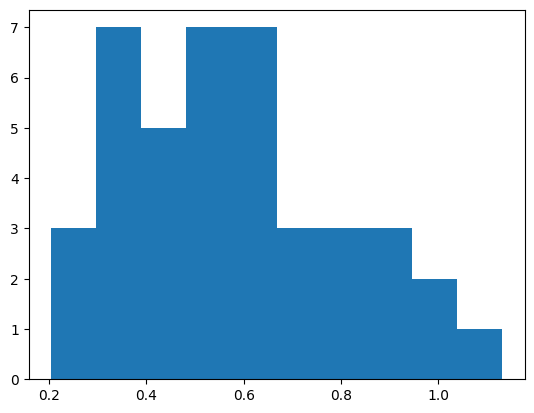

In [153]:
plt.hist([cp.max_anomaly_qv for cp in cold_pools])

In [5]:
import pandas as pd
import numpy as np

# Load the CSVs
summary_df = pd.read_csv("/Volumes/LaCie/000_POSTDOC_2025/long_high_res/cold_pools_summary_ALL.csv")
timeseries_df = pd.read_csv("/Volumes/LaCie/000_POSTDOC_2025/long_high_res/cold_pools_timeseries_ALL.csv")

# Group the time series by (simulation, label_id)
grouped_ts = timeseries_df.groupby(['simulation', 'label_id'])

# Merge for quick lookup
summary_df.set_index(['simulation', 'label_id'], inplace=True)

# List to store cold pools
cold_pools = []

# Loop over each cold pool
for (sim, label), group in grouped_ts:
    try:
        summary = summary_df.loc[(sim, label)]
    except KeyError:
        print(f"Summary not found for {sim} - {label}")
        continue

    cp = {
        'simulation': sim,
        'label_id': label,
        'start_time': summary['start_time'],
        'end_time': summary['end_time'],
        'duration': summary['duration'],
        'mean_qv': summary['mean_qv'],
        'anomaly_qv': summary['anomaly_qv'],
        'max_anomaly_qv': summary['max_anomaly_qv'],
        'max_size': summary['max_size'],
        'global_times': group['global_time'].values,
        'sizes': group['size'].values,
        'qv_anomalies': group['anomaly_qv'].values
    }

    cold_pools.append(cp)


In [11]:
summary_df

start_time  end_time  duration  \
simulation                 label_id                                   
RCE_T300_U8_B1_M1_split_4  1.0                0       118       119   
                           2.0                0         8         9   
                           5.0                7        16        10   
                           4.0              114       125        12   
                           8.0              117       174        58   
...                                         ...       ...       ...   
RCE_T300_U8_B1_M1_split_39 47.0             489       506        18   
                           48.0             492       496         5   
                           49.0             497       540        44   
                           50.0             497       500         4   
                           51.0             534       536         3   

                                     start_size  end_size  max_size  \
simulation                 label_id                                   
RCE_T300_U8_B1_M1_split_4  1.0              134      2367      3488   
                           2.0              457       627       627   
                           5.0               35       884       884   
                           4.0               90       315       315   
                           8.0              640      1594      3730   
...                                         ...       ...       ...   
RCE_T300_U8_B1_M1_split_39 47.0              40        91       117   
                           48.0             380      1729      1730   
                           49.0             787      1100      1745   
                           50.0             947      1086      1086   
                           51.0             318       296       318   

                                       mean_qv  mean_domain_qv  anomaly_qv  \
simulation                 label_id                                          
RCE_T300_U8_B1_M1_split_4  1.0       17.083547       16.615183    0.468365   
                           2.0       16.929239       16.633144    0.296095   
                           5.0       16.847697       16.596966    0.250731   
                           4.0       17.187599       16.617607    0.569991   
                           8.0       16.915336       16.599981    0.315354   
...                                        ...             ...         ...   
RCE_T300_U8_B1_M1_split_39 47.0      15.450332       16.496796   -1.046463   
                           48.0      16.817228       16.496016    0.321212   
                           49.0      16.764428       16.506630    0.257798   
                           50.0      16.702862       16.493214    0.209649   
                           51.0      16.842915       16.523335    0.319580   

                                     max_anomaly_qv  
simulation                 label_id                  
RCE_T300_U8_B1_M1_split_4  1.0             0.591959  
                           2.0             0.345682  
                           5.0             0.323635  
                           4.0             0.646860  
                           8.0             0.444416  
...                                             ...  
RCE_T300_U8_B1_M1_split_39 47.0            1.472539  
                           48.0            0.352995  
                           49.0            0.477255  
                           50.0            0.234699  
                           51.0            0.343100  

[1871 rows x 10 columns]

In [9]:
for cp in cold_pools:
    print(cp['simulation'])

RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
RCE_T300_U8_B1_M1_split_10
R

(0.0, 2500.0)

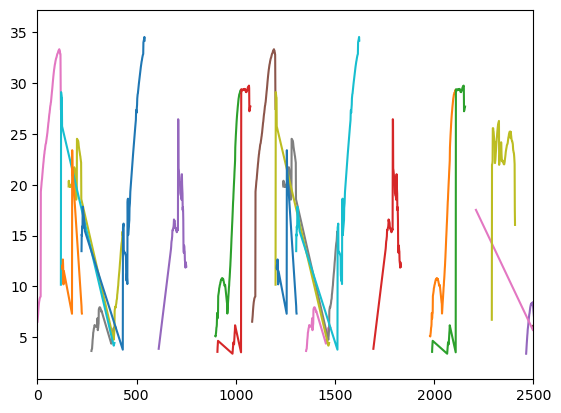

In [12]:
# Now loop through all cold pools
for cp in cold_pools:
    r = np.sqrt(cp['sizes'] / np.pi)
    if cp["duration"]>100:
        plt.plot(cp['global_times'], r, label=f"{cp['simulation']}_{cp['label_id']}")


plt.xlim(0,2500)

In [15]:
cp["duration"]

np.float64(2.0)

In [2]:
import numpy as np
num_epochs=400
np.linspace(0.01, 0.5, num_epochs)

array([0.01      , 0.01122807, 0.01245614, 0.01368421, 0.01491228,
       0.01614035, 0.01736842, 0.01859649, 0.01982456, 0.02105263,
       0.0222807 , 0.02350877, 0.02473684, 0.02596491, 0.02719298,
       0.02842105, 0.02964912, 0.03087719, 0.03210526, 0.03333333,
       0.0345614 , 0.03578947, 0.03701754, 0.03824561, 0.03947368,
       0.04070175, 0.04192982, 0.04315789, 0.04438596, 0.04561404,
       0.04684211, 0.04807018, 0.04929825, 0.05052632, 0.05175439,
       0.05298246, 0.05421053, 0.0554386 , 0.05666667, 0.05789474,
       0.05912281, 0.06035088, 0.06157895, 0.06280702, 0.06403509,
       0.06526316, 0.06649123, 0.0677193 , 0.06894737, 0.07017544,
       0.07140351, 0.07263158, 0.07385965, 0.07508772, 0.07631579,
       0.07754386, 0.07877193, 0.08      , 0.08122807, 0.08245614,
       0.08368421, 0.08491228, 0.08614035, 0.08736842, 0.08859649,
       0.08982456, 0.09105263, 0.0922807 , 0.09350877, 0.09473684,
       0.09596491, 0.09719298, 0.09842105, 0.09964912, 0.10087